In [1]:
import pandas as pd
import numpy as np
from jeffutils.utils import set_np_pd_display_params, print_display, movecol
import os
import matplotlib.pyplot as plt
from itertools import product
from sklearn.neighbors import KernelDensity
from collections import defaultdict
from tqdm.auto import tqdm

from py_files.data_manager import RELEVANT_COLUMNS, EVENTS_IGNORED, load_and_clean_csv
from py_files.healper_funcs import get_data, get_label_encoder

set_np_pd_display_params(np, pd)
# set max rows for pandas dataframe to 100
pd.set_option("display.max_rows", 100)

DATA_PATH = "data/play_by_play/"

# load ALL of the data and clean it

In [2]:
dataframes = []
for file in sorted(list(os.listdir(DATA_PATH))):
    if file.endswith(".csv") and 'play_by_play' in file:
        print(file)
        df = load_and_clean_csv(os.path.join(DATA_PATH, file))
        df.reset_index(drop=True).to_feather(os.path.join(DATA_PATH, file.replace(".csv", "_clean.feather")))
        dataframes.append(df)

df_orig = pd.concat(dataframes, ignore_index=True)
df_orig = df_orig.sort_values(by=["date_time", "game_id", "game_seconds"]).reset_index(drop=True)
df_orig.reset_index(drop=True).to_feather(os.path.join(DATA_PATH, "play_by_play_full.feather"))

play_by_play_2010_11.csv
play_by_play_2011_12.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2012_13.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2013_14.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (47,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2014_15.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (49,56,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2015_16.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (49,55,56,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2016_17.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (56,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2017_18.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (47,54,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2018_19.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2019_20.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (49,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2020_21.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (49,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2021_22.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (49,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2022_23.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (48,49,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


play_by_play_2023_24.csv


/home/jeffx/ACME/NHL_Win_Predictor/py_files/data_manager.py:48: DtypeWarning: Columns (42,43,49,50,120,136) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


# load the full play_by_play feather fule

In [55]:
df_orig = pd.read_feather(os.path.join(DATA_PATH, "play_by_play_full.feather"))
display(df_orig)

,game_date,date_time,game_id,home_name,away_name,event_type,penalty_severity,penalty_minutes,event_team,event_team_type,period_type,period,period_seconds,period_seconds_remaining,game_seconds,game_seconds_remaining,home_score,away_score,home_final,away_final,strength_state,strength_code,strength,empty_net,extra_attacker,home_skaters,away_skaters
0,2010-10-07,2010-10-07T23:15:46Z,2010020002,Pittsburgh Penguins,Philadelphia Flyers,FACEOFF,-,0.0000000,Pittsburgh Penguins,home,REGULAR,1,0,1200.0000000,0,3600,0,0,2.0000000,3.0000000,5v4,PP,Power Play,-,False,5.0000000,4.0000000
1,2010-10-07,2010-10-07T23:16:26Z,2010020002,Pittsburgh Penguins,Philadelphia Flyers,BLOCKED_SHOT,-,0.0000000,Philadelphia Flyers,away,REGULAR,1,25,1175.0000000,25,3575,0,0,2.0000000,3.0000000,4v5,SH,Shorthanded,-,False,5.0000000,4.0000000
2,2010-10-07,2010-10-07T23:16:38Z,2010020002,Pittsburgh Penguins,Philadelphia Flyers,FACEOFF,-,0.0000000,Philadelphia Flyers,away,REGULAR,1,26,1174.0000000,26,3574,0,0,2.0000000,3.0000000,5v5,EV,Even,-,False,5.0000000,5.0000000
3,2010-10-07,2010-10-07T23:17:02Z,2010020002,Pittsburgh Penguins,Philadelphia Flyers,FACEOFF,-,0.0000000,Philadelphia Flyers,away,REGULAR,1,29,1171.0000000,29,3571,0,0,2.0000000,3.0000000,5v5,EV,Even,-,False,5.0000000,5.0000000
4,2010-10-07,2010-10-07T23:17:12Z,2010020002,Pittsburgh Penguins,Philadelphia Flyers,SHOT,-,0.0000000,Philadelphia Flyers,away,REGULAR,1,32,1168.0000000,32,3568,0,0,2.0000000,3.0000000,5v5,EV,Even,-,False,5.0000000,5.0000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526317,2024-03-16,2024-03-16,2023021072,Vancouver Canucks,Washington Capitals,BLOCKED_SHOT,-,0.0000000,Vancouver Canucks,home,REGULAR,3,1155,45.0000000,3555,45,1,2,1.0000000,2.0000000,6v5,PP,Power Play,False,True,6.0000000,5.0000000
4526318,2024-03-16,2024-03-16,2023021072,Vancouver Canucks,Washington Capitals,SHOT,-,0.0000000,Vancouver Canucks,home,REGULAR,3,1185,15.0000000,3585,15,1,2,1.0000000,2.0000000,6v5,PP,Power Play,False,True,6.0000000,5.0000000
4526319,2024-03-16,2024-03-16,2023021072,Vancouver Canucks,Washington Capitals,SHOT,-,0.0000000,Vancouver Canucks,home,REGULAR,3,1186,14.0000000,3586,14,1,2,1.0000000,2.0000000,6v5,PP,Power Play,False,True,6.0000000,5.0000000
4526320,2024-03-16,2024-03-16,2023021072,Vancouver Canucks,Washington Capitals,FACEOFF,-,0.0000000,Vancouver Canucks,home,REGULAR,3,1187,13.0000000,3587,13,1,2,1.0000000,2.0000000,6v5,PP,Power Play,False,True,6.0000000,5.0000000


# create the net_player feature

In [56]:
df_net = df_orig.copy()
df_net['home_skaters'] = df_net['home_skaters'].astype(int)
df_net['away_skaters'] = df_net['away_skaters'].astype(int)

# forward fill the home_skaters zero values
df_net['home_skaters'] = df_net['home_skaters'].replace(0, np.nan).ffill().astype(int)
df_net['away_skaters'] = df_net['away_skaters'].replace(0, np.nan).ffill().astype(int)

# compute a new strength_state column that is always in perspective of home
df_net['strength_state'] = df_net['home_skaters'].copy().astype(str) + 'v' + df_net['away_skaters'].copy().astype(str)

# create the net_players column that keeps track of when home or away are in a power play or short handed
df_net['net_players'] = 'EV'
df_net.loc[df_net['home_skaters'] > df_net['away_skaters'], 'net_players'] = 'PP'
df_net.loc[df_net['home_skaters'] < df_net['away_skaters'], 'net_players'] = 'SH'
display(df_net['net_players'].value_counts())

net_players
EV    3666903
PP     444309
SH     415110
Name: count, dtype: int64

# setup df_events

In [59]:
df = df_net.copy()

# consolidate the overall dataframe into a dataframe with just events and the net_players entry
#df_events = df[['game_id', 'event_type', 'game_seconds', 'event_team_type', 'net_players']].copy()
df_events = df[['game_id', 'event_type', 'game_seconds', 'event_team_type']].copy()

# ignore the HIT events
df_events = df_events.loc[~(df_events['event_type'] == 'HIT'), :].copy()

df_events['event'] = (
    df_events['event_type'].astype(str) 
    +'_' + df_events['event_team_type'].astype(str).str.upper()  
    #+ "_" + df_events['net_players'].astype(str)
)
df_events = df_events.sort_values(by=['game_id', 'game_seconds'], ascending=[True, True])
df_events = df_events[['game_id', 'event', 'game_seconds']]

first_rows = df_events['game_id'] != df_events['game_id'].shift(1)
df_events['seconds_diff'] = np.abs(df_events['game_seconds'].diff().fillna(0))
df_events.loc[first_rows, 'seconds_diff'] = 0
df_events = df_events.reset_index(drop=True)

In [60]:
display(df_events)
display(df_events['event'].value_counts())

,game_id,event,game_seconds,seconds_diff
0,2010020001,FACEOFF_AWAY,0,0.0000000
1,2010020001,GIVEAWAY_HOME,69,69.0000000
2,2010020001,BLOCKED_SHOT_AWAY,73,4.0000000
3,2010020001,SHOT_AWAY,86,13.0000000
4,2010020001,SHOT_AWAY,91,5.0000000
...,...,...,...,...
3712188,2023021072,BLOCKED_SHOT_HOME,3555,13.0000000
3712189,2023021072,SHOT_HOME,3585,30.0000000
3712190,2023021072,SHOT_HOME,3586,1.0000000
3712191,2023021072,FACEOFF_HOME,3587,1.0000000


event
FACEOFF_HOME         528242
FACEOFF_AWAY         498455
SHOT_HOME            498185
SHOT_AWAY            475771
BLOCKED_SHOT_HOME    257169
BLOCKED_SHOT_AWAY    247369
MISSED_SHOT_HOME     216040
MISSED_SHOT_AWAY     200337
GIVEAWAY_HOME        176516
TAKEAWAY_HOME        136502
GIVEAWAY_AWAY        129360
TAKEAWAY_AWAY        106147
PENALTY_AWAY          71964
PENALTY_HOME          67324
GOAL_HOME             53638
GOAL_AWAY             49167
BLOCKED_SHOT_-            7
Name: count, dtype: int64

# compute the probability tables for the MC

In [61]:
# only keep the event and the game_id
df_mc = df_events[['game_id', 'event']].copy()

# keep track of the first rows of each game
first_rows = df_mc['game_id'] != df_mc['game_id'].shift(1)
second_rows = (df_mc['game_id'] != df_mc['game_id'].shift(2)) & (~first_rows)
third_rows = (df_mc['game_id'] != df_mc['game_id'].shift(3)) & (~first_rows) & (~second_rows)

# find the previous 1,2,3 events and add a placehold "#" if there is not prevx event
df_mc['prev1'] = df_mc['event'].shift(1)
df_mc['prev2'] = df_mc['event'].shift(2)
df_mc['prev3'] = df_mc['event'].shift(3)
df_mc.loc[first_rows, 'prev1'] = "#"
df_mc.loc[first_rows | second_rows, 'prev2'] = "#"
df_mc.loc[first_rows | second_rows | third_rows, 'prev3'] = "#"

# concatenate the previous events into a 3-state representation
df_mc = df_mc.dropna()
df_mc['prev_events'] =  df_mc['prev3'] + ',' + df_mc['prev2'] + ',' + df_mc['prev1']
df_mc['curr_event'] = df_mc['event']

# create a probabilities dataframe that continas the probability of moving from
# prev3-prev2-prev1 -> curr_event
prev_events = df_mc['prev_events'].unique()
curr_events = df_mc['curr_event'].unique()

probabilities3 = pd.DataFrame(list(product(prev_events, curr_events)), columns=['prev_events', 'curr_event'])
probabilities3['join'] = probabilities3['prev_events'] + '|' + probabilities3['curr_event']

# compute the given-this counts
given_counts = df_mc['prev_events'].value_counts()
given_counts = pd.DataFrame(given_counts).reset_index()
given_counts.columns = ['prev_events', 'given_count']

# compute the joint counts
df_mc['join'] = df_mc['prev_events'] + '|' + df_mc['curr_event']
join_counts = df_mc['join'].value_counts()
join_counts = pd.DataFrame(join_counts).reset_index()
join_counts.columns = ['join', 'join_count']

# join the counts onto the probabilities dataframe
probabilities3 = probabilities3.merge(given_counts, on='prev_events', how='left')
probabilities3 = probabilities3.merge(join_counts, on='join', how='left')
probabilities3 = probabilities3.fillna(0)
probabilities3['probability'] = probabilities3['join_count'] / probabilities3['given_count']
probabilities3 = probabilities3.sort_values(by='probability', ascending=False)
probabilities3 = probabilities3[['prev_events', 'curr_event', 'probability', 'given_count', 'join_count']]
display(probabilities3)

,prev_events,curr_event,probability,given_count,join_count
49528,"BLOCKED_SHOT_AWAY,GOAL_AWAY,BLOCKED_SHOT_AWAY",FACEOFF_HOME,1.0000000,1,1.0000000
54468,"MISSED_SHOT_HOME,PENALTY_HOME,BLOCKED_SHOT_HOME",FACEOFF_AWAY,1.0000000,1,1.0000000
48331,"PENALTY_HOME,TAKEAWAY_HOME,GOAL_HOME",FACEOFF_AWAY,1.0000000,1,1.0000000
48323,"PENALTY_HOME,PENALTY_HOME,TAKEAWAY_HOME",GOAL_HOME,1.0000000,1,1.0000000
46910,"PENALTY_HOME,BLOCKED_SHOT_AWAY,GOAL_AWAY",FACEOFF_HOME,1.0000000,1,1.0000000
...,...,...,...,...,...
41612,"GIVEAWAY_HOME,GIVEAWAY_HOME,GOAL_AWAY",GOAL_AWAY,0.0000000,273,0.0000000
41611,"GIVEAWAY_HOME,GIVEAWAY_HOME,GOAL_AWAY",TAKEAWAY_AWAY,0.0000000,273,0.0000000
41610,"GIVEAWAY_HOME,GIVEAWAY_HOME,GOAL_AWAY",MISSED_SHOT_HOME,0.0000000,273,0.0000000
41609,"GIVEAWAY_HOME,GIVEAWAY_HOME,GOAL_AWAY",TAKEAWAY_HOME,0.0000000,273,0.0000000


In [62]:
# only keep the event and the game_id
df_mc = df_events[['game_id', 'event']].copy()

# keep track of the first rows of each game
first_rows = df_mc['game_id'] != df_mc['game_id'].shift(1)
second_rows = (df_mc['game_id'] != df_mc['game_id'].shift(2)) & (~first_rows)

# find the previous 1,2,3 events and add a placehold "#" if there is not prevx event
df_mc['prev1'] = df_mc['event'].shift(1)
df_mc['prev2'] = df_mc['event'].shift(2)
df_mc.loc[first_rows, 'prev1'] = "#"
df_mc.loc[first_rows | second_rows, 'prev2'] = "#"

# concatenate the previous events into a 3-state representation
df_mc = df_mc.dropna()
df_mc['prev_events'] =  df_mc['prev2'] + ',' + df_mc['prev1']
df_mc['curr_event'] = df_mc['event']

# create a probabilities dataframe that continas the probability of moving from
# prev3-prev2-prev1 -> curr_event
prev_events = df_mc['prev_events'].unique()
curr_events = df_mc['curr_event'].unique()

probabilities2 = pd.DataFrame(list(product(prev_events, curr_events)), columns=['prev_events', 'curr_event'])
probabilities2['join'] = probabilities2['prev_events'] + '|' + probabilities2['curr_event']

# compute the given-this counts
given_counts = df_mc['prev_events'].value_counts()
given_counts = pd.DataFrame(given_counts).reset_index()
given_counts.columns = ['prev_events', 'given_count']

# compute the joint counts
df_mc['join'] = df_mc['prev_events'] + '|' + df_mc['curr_event']
join_counts = df_mc['join'].value_counts()
join_counts = pd.DataFrame(join_counts).reset_index()
join_counts.columns = ['join', 'join_count']

# join the counts onto the probabilities dataframe
probabilities2 = probabilities2.merge(given_counts, on='prev_events', how='left')
probabilities2 = probabilities2.merge(join_counts, on='join', how='left')
probabilities2 = probabilities2.fillna(0)
probabilities2['probability'] = probabilities2['join_count'] / probabilities2['given_count']
probabilities2 = probabilities2.sort_values(by='probability', ascending=False)
probabilities2 = probabilities2[['prev_events', 'curr_event', 'probability', 'given_count', 'join_count']]
display(probabilities2)

,prev_events,curr_event,probability,given_count,join_count
4420,"GOAL_AWAY,TAKEAWAY_HOME",FACEOFF_AWAY,1.0000000,1,1.0000000
4620,"GOAL_HOME,GOAL_HOME",GOAL_AWAY,1.0000000,2,2.0000000
4308,"#,SHOT_AWAY",FACEOFF_HOME,1.0000000,1,1.0000000
4561,"BLOCKED_SHOT_-,FACEOFF_AWAY",GIVEAWAY_AWAY,1.0000000,1,1.0000000
4403,"#,BLOCKED_SHOT_AWAY",FACEOFF_AWAY,1.0000000,1,1.0000000
...,...,...,...,...,...
2294,"MISSED_SHOT_AWAY,SHOT_AWAY",BLOCKED_SHOT_-,0.0000000,38313,0.0000000
3807,"GOAL_HOME,GOAL_AWAY",BLOCKED_SHOT_-,0.0000000,478,0.0000000
3806,"GOAL_HOME,GOAL_AWAY",PENALTY_HOME,0.0000000,478,0.0000000
3805,"GOAL_HOME,GOAL_AWAY",PENALTY_AWAY,0.0000000,478,0.0000000


In [63]:
# only keep the event and the game_id
df_mc = df_events[['game_id', 'event']].copy()

# keep track of the first rows of each game
first_rows = df_mc['game_id'] != df_mc['game_id'].shift(1)

# find the previous 1,2,3 events and add a placehold "#" if there is not prevx event
df_mc['prev1'] = df_mc['event'].shift(1)
df_mc.loc[first_rows, 'prev1'] = "#"

# concatenate the previous events into a 3-state representation
df_mc = df_mc.dropna()
df_mc['prev_events'] =  df_mc['prev1']
df_mc['curr_event'] = df_mc['event']

# create a probabilities dataframe that continas the probability of moving from
# prev3-prev2-prev1 -> curr_event
prev_events = df_mc['prev_events'].unique()
curr_events = df_mc['curr_event'].unique()

probabilities1 = pd.DataFrame(list(product(prev_events, curr_events)), columns=['prev_events', 'curr_event'])
probabilities1['join'] = probabilities1['prev_events'] + '|' + probabilities1['curr_event']

# compute the given-this counts
given_counts = df_mc['prev_events'].value_counts()
given_counts = pd.DataFrame(given_counts).reset_index()
given_counts.columns = ['prev_events', 'given_count']

# compute the joint counts
df_mc['join'] = df_mc['prev_events'] + '|' + df_mc['curr_event']
join_counts = df_mc['join'].value_counts()
join_counts = pd.DataFrame(join_counts).reset_index()
join_counts.columns = ['join', 'join_count']

# join the counts onto the probabilities dataframe
probabilities1 = probabilities1.merge(given_counts, on='prev_events', how='left')
probabilities1 = probabilities1.merge(join_counts, on='join', how='left')
probabilities1 = probabilities1.fillna(0)
probabilities1['probability'] = probabilities1['join_count'] / probabilities1['given_count']
probabilities1 = probabilities1.sort_values(by='probability', ascending=False)
probabilities1 = probabilities1[['prev_events', 'curr_event', 'probability', 'given_count', 'join_count']]
display(probabilities1)

,prev_events,curr_event,probability,given_count,join_count
7,#,FACEOFF_HOME,0.5067432,17425,8830.0000000
177,GOAL_HOME,FACEOFF_HOME,0.4927228,52149,25695.0000000
0,#,FACEOFF_AWAY,0.4921664,17425,8576.0000000
245,GOAL_AWAY,FACEOFF_HOME,0.4813988,47497,22865.0000000
238,GOAL_AWAY,FACEOFF_AWAY,0.4812304,47497,22857.0000000
...,...,...,...,...,...
254,GOAL_AWAY,BLOCKED_SHOT_-,0.0000000,47497,0.0000000
271,PENALTY_AWAY,BLOCKED_SHOT_-,0.0000000,71759,0.0000000
5,#,GIVEAWAY_AWAY,0.0000000,17425,0.0000000
4,#,MISSED_SHOT_AWAY,0.0000000,17425,0.0000000


In [64]:
probabilities1.to_csv('data/probabilities1_NOHIT.csv', index=False)
probabilities2.to_csv('data/probabilities2_NOHIT.csv', index=False)
probabilities3.to_csv('data/probabilities3_NOHIT.csv', index=False)

In [65]:
# create a probabilities dataframe with all of the possible 3-state + curr combinations
start_states = [('#', '#', '#')]
start_states += list(product(['#'], ['#'], curr_events))
start_states += list(product(['#'], curr_events, curr_events))
start_states += list(product(curr_events, curr_events, curr_events))

all_states = list(product(start_states, curr_events))
all_states = [a + (b, ) for a, b in all_states]

probabilities_avg = pd.DataFrame(all_states, columns=['prev3', 'prev2', 'prev1', 'curr_event'])
probabilities_avg['3event'] = probabilities_avg['prev3'] + ',' + probabilities_avg['prev2'] + ',' + probabilities_avg['prev1']
probabilities_avg['2event'] = probabilities_avg['prev2'] + ',' + probabilities_avg['prev1']
probabilities_avg['1event'] = probabilities_avg['prev1']

probabilities_avg['3event_join'] = probabilities_avg['3event'] + '|' + probabilities_avg['curr_event']
probabilities_avg['2event_join'] = probabilities_avg['2event'] + '|' + probabilities_avg['curr_event']
probabilities_avg['1event_join'] = probabilities_avg['1event'] + '|' + probabilities_avg['curr_event']

probabilities1['1event_join'] = probabilities1['prev_events'] + '|' + probabilities1['curr_event']
probabilities2['2event_join'] = probabilities2['prev_events'] + '|' + probabilities2['curr_event']
probabilities3['3event_join'] = probabilities3['prev_events'] + '|' + probabilities3['curr_event']

probabilities_avg = probabilities_avg.merge(probabilities1[['1event_join', 'probability', 'given_count', 'join_count']], on='1event_join', how='left', suffixes=('', '_1'))
probabilities_avg = probabilities_avg.merge(probabilities2[['2event_join', 'probability', 'given_count', 'join_count']], on='2event_join', how='left', suffixes=('', '_2'))
probabilities_avg = probabilities_avg.merge(probabilities3[['3event_join', 'probability', 'given_count', 'join_count']], on='3event_join', how='left', suffixes=('', '_3'))
probabilities_avg = probabilities_avg.fillna(0)
probabilities_avg = probabilities_avg.rename(columns={'given_count': 'given_count_1', 'join_count': 'join_count_1', 'probability': 'probability_1'})

probabilities_avg['probability_avg'] = (probabilities_avg['probability_1'] + probabilities_avg['probability_2'] + probabilities_avg['probability_3']) / 3
rel_cols = [
    'prev3', 'prev2', 'prev1', 'curr_event', 'probability_avg',
    'probability_1', 'probability_2', 'probability_3',
    'given_count_1', 'given_count_2', 'given_count_3',
    'join_count_1',  'join_count_2', 'join_count_3']
probabilities_avg = probabilities_avg[rel_cols]

display(probabilities_avg)


,prev3,prev2,prev1,curr_event,probability_avg,probability_1,probability_2,probability_3,given_count_1,given_count_2,given_count_3,join_count_1,join_count_2,join_count_3
0,#,#,#,FACEOFF_AWAY,0.4921664,0.4921664,0.4921664,0.4921664,17425,17425.0000000,17425.0000000,8576.0000000,8576.0000000,8576.0000000
1,#,#,#,GIVEAWAY_HOME,0.0000574,0.0000574,0.0000574,0.0000574,17425,17425.0000000,17425.0000000,1.0000000,1.0000000,1.0000000
2,#,#,#,BLOCKED_SHOT_AWAY,0.0000574,0.0000574,0.0000574,0.0000574,17425,17425.0000000,17425.0000000,1.0000000,1.0000000,1.0000000
3,#,#,#,SHOT_AWAY,0.0000574,0.0000574,0.0000574,0.0000574,17425,17425.0000000,17425.0000000,1.0000000,1.0000000,1.0000000
4,#,#,#,MISSED_SHOT_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,17425,17425.0000000,17425.0000000,0.0000000,0.0000000,0.0000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88735,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,TAKEAWAY_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
88736,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,GOAL_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
88737,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,PENALTY_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
88738,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,PENALTY_HOME,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


In [67]:
probabilities_avg.to_csv('data/probabilities_avg_NOHIT.csv', index=False)

# analysis / display stuff

Number of events per type over 10 years
event_type
FACEOFF         1026697
SHOT             973956
HIT              814129
BLOCKED_SHOT     504538
MISSED_SHOT      416377
GIVEAWAY         305876
TAKEAWAY         242649
PENALTY          139288
GOAL             102805
Name: count, dtype: int64
Events per game


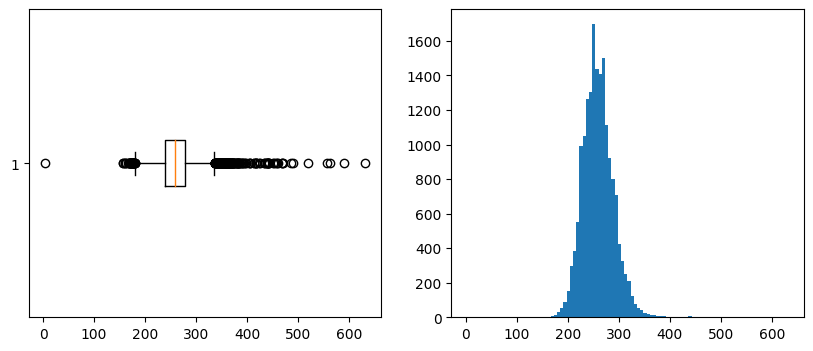

In [115]:
# show the number of times each event occurs
print("Number of events per type over 10 years")
print(df['event_type'].value_counts())

# show the distribution of events per game
events_per_game = df.groupby('game_id').count()['event_type']
print("Events per game")
plt.subplot(1,2,1)
plt.boxplot(events_per_game, vert=False)
plt.subplot(1,2,2)
plt.hist(events_per_game, bins=100)
plt.gcf().set_size_inches(10, 4)
plt.show()

In [104]:
# print a correlation matrix between the columns probability_1, probability_2, probability_3
corr = probabilities_avg[['probability_1', 'probability_2', 'probability_3']].corr()
display(corr)

,probability_1,probability_2,probability_3
probability_1,1.0000000,0.7953449,0.5956938
probability_2,0.7953449,1.0000000,0.5951818
probability_3,0.5956938,0.5951818,1.0000000


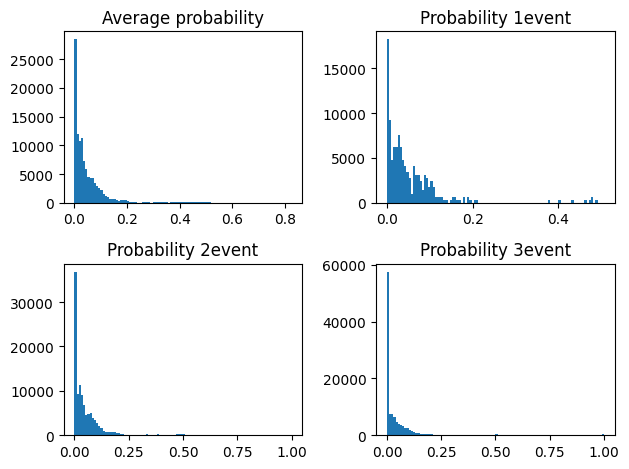

In [120]:

plt.subplot(2, 2, 1)
plt.hist(probabilities_avg['probability_avg'], label="avg", bins=100)
plt.title("Average probability")

plt.subplot(2, 2, 2)
plt.hist(probabilities_avg['probability_1'], label="1event", bins=100)
plt.title("Probability 1event")

plt.subplot(2, 2, 3)
plt.hist(probabilities_avg['probability_2'], label="2event", bins=100)
plt.title("Probability 2event")

plt.subplot(2, 2, 4)
plt.hist(probabilities_avg['probability_3'], label="3event", bins=100)
plt.title("Probability 3event")

plt.tight_layout()
plt.show()


# seconds in game analysis

In [138]:
display(df_orig[df_orig['game_id'] == 2010020048])

,event_type,game_seconds_remaining,event_team_type,home_final,game_id,home_final,away_final,home_name,away_name
28622,GAME_SCHEDULED,3600,NaN,2.0000000,2010020048,2.0000000,3.0000000,New Jersey Devils,Colorado Avalanche
28623,CHANGE,3600,away,2.0000000,2010020048,2.0000000,3.0000000,New Jersey Devils,Colorado Avalanche
28624,CHANGE,3600,home,2.0000000,2010020048,2.0000000,3.0000000,New Jersey Devils,Colorado Avalanche
28625,FACEOFF,3600,away,2.0000000,2010020048,2.0000000,3.0000000,New Jersey Devils,Colorado Avalanche
28626,SHOT,3569,home,2.0000000,2010020048,2.0000000,3.0000000,New Jersey Devils,Colorado Avalanche
...,...,...,...,...,...,...,...,...,...
29125,SHOT,3,home,2.0000000,2010020048,2.0000000,3.0000000,New Jersey Devils,Colorado Avalanche
29126,CHANGE,0,away,2.0000000,2010020048,2.0000000,3.0000000,New Jersey Devils,Colorado Avalanche
29127,CHANGE,0,home,2.0000000,2010020048,2.0000000,3.0000000,New Jersey Devils,Colorado Avalanche
29128,PERIOD_END,0,NaN,2.0000000,2010020048,2.0000000,3.0000000,New Jersey Devils,Colorado Avalanche


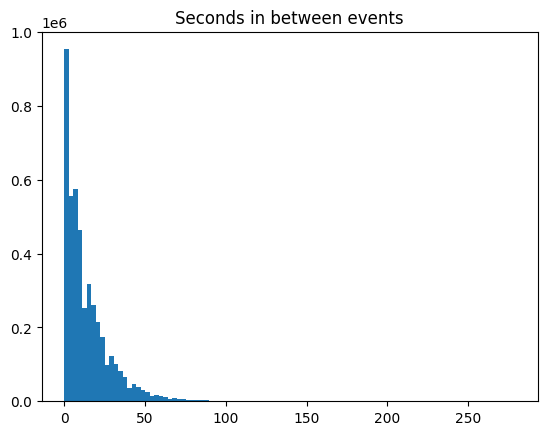

In [12]:
plt.title("Seconds in between events")
df_events['minutes_diff'] = df_events['seconds_diff'] / 60
df_events = df_events[df_events['seconds_diff'] < 400]

plt.hist(df_events['seconds_diff'], bins=100)
plt.show()

# simulate a game

In [68]:
#probs = pd.read_csv("data/probabilities_avg.csv")
probs = pd.read_csv("data/probabilities_avg_NOHIT.csv")
display(probs)

events = probs['curr_event'].unique()
print(events)

,prev3,prev2,prev1,curr_event,probability_avg,probability_1,probability_2,probability_3,given_count_1,given_count_2,given_count_3,join_count_1,join_count_2,join_count_3
0,#,#,#,FACEOFF_AWAY,0.4921664,0.4921664,0.4921664,0.4921664,17425,17425.0000000,17425.0000000,8576.0000000,8576.0000000,8576.0000000
1,#,#,#,GIVEAWAY_HOME,0.0000574,0.0000574,0.0000574,0.0000574,17425,17425.0000000,17425.0000000,1.0000000,1.0000000,1.0000000
2,#,#,#,BLOCKED_SHOT_AWAY,0.0000574,0.0000574,0.0000574,0.0000574,17425,17425.0000000,17425.0000000,1.0000000,1.0000000,1.0000000
3,#,#,#,SHOT_AWAY,0.0000574,0.0000574,0.0000574,0.0000574,17425,17425.0000000,17425.0000000,1.0000000,1.0000000,1.0000000
4,#,#,#,MISSED_SHOT_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,17425,17425.0000000,17425.0000000,0.0000000,0.0000000,0.0000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88735,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,TAKEAWAY_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
88736,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,GOAL_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
88737,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,PENALTY_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
88738,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,PENALTY_HOME,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


['FACEOFF_AWAY' 'GIVEAWAY_HOME' 'BLOCKED_SHOT_AWAY' 'SHOT_AWAY'
 'MISSED_SHOT_AWAY' 'GIVEAWAY_AWAY' 'BLOCKED_SHOT_HOME' 'FACEOFF_HOME'
 'SHOT_HOME' 'GOAL_HOME' 'TAKEAWAY_HOME' 'MISSED_SHOT_HOME'
 'TAKEAWAY_AWAY' 'GOAL_AWAY' 'PENALTY_AWAY' 'PENALTY_HOME'
 'BLOCKED_SHOT_-']


In [69]:
# more or less normalize the probabilities
probs_sums = (probs
    .copy()
    .groupby(by=['prev3', 'prev2', 'prev1'])
    [['probability_avg', 'probability_1', 'probability_2', 'probability_3']]
    .sum()
    .reset_index()
    .rename(columns={
        'probability_avg': 'probability_avg_sum',
        'probability_1': 'probability_1_sum',
        'probability_2': 'probability_2_sum',
        'probability_3': 'probability_3_sum'}))

display(probs_sums)

probs2 = pd.merge(probs, probs_sums, on=['prev3', 'prev2', 'prev1'], how='left')
probs2['probability_avg'] /= probs2['probability_avg_sum']
probs2['probability_1'] /= probs2['probability_1_sum']
probs2['probability_2'] /= probs2['probability_2_sum']
probs2['probability_3'] /= probs2['probability_3_sum']
probs2 = probs2.drop(columns=[
    'probability_avg_sum', 'probability_1_sum', 'probability_2_sum', 'probability_3_sum'])

probs2 = probs2.fillna(0)
display(probs2)

,prev3,prev2,prev1,probability_avg_sum,probability_1_sum,probability_2_sum,probability_3_sum
0,#,#,#,1.0000000,1.0000000,1.0000000,1.0000000
1,#,#,BLOCKED_SHOT_-,0.3333333,1.0000000,0.0000000,0.0000000
2,#,#,BLOCKED_SHOT_AWAY,1.0000000,1.0000000,1.0000000,1.0000000
3,#,#,BLOCKED_SHOT_HOME,1.0000000,1.0000000,1.0000000,1.0000000
4,#,#,FACEOFF_AWAY,1.0000000,1.0000000,1.0000000,1.0000000
...,...,...,...,...,...,...,...
5215,TAKEAWAY_HOME,TAKEAWAY_HOME,PENALTY_HOME,1.0000000,1.0000000,1.0000000,1.0000000
5216,TAKEAWAY_HOME,TAKEAWAY_HOME,SHOT_AWAY,1.0000000,1.0000000,1.0000000,1.0000000
5217,TAKEAWAY_HOME,TAKEAWAY_HOME,SHOT_HOME,1.0000000,1.0000000,1.0000000,1.0000000
5218,TAKEAWAY_HOME,TAKEAWAY_HOME,TAKEAWAY_AWAY,1.0000000,1.0000000,1.0000000,1.0000000


,prev3,prev2,prev1,curr_event,probability_avg,probability_1,probability_2,probability_3,given_count_1,given_count_2,given_count_3,join_count_1,join_count_2,join_count_3
0,#,#,#,FACEOFF_AWAY,0.4921664,0.4921664,0.4921664,0.4921664,17425,17425.0000000,17425.0000000,8576.0000000,8576.0000000,8576.0000000
1,#,#,#,GIVEAWAY_HOME,0.0000574,0.0000574,0.0000574,0.0000574,17425,17425.0000000,17425.0000000,1.0000000,1.0000000,1.0000000
2,#,#,#,BLOCKED_SHOT_AWAY,0.0000574,0.0000574,0.0000574,0.0000574,17425,17425.0000000,17425.0000000,1.0000000,1.0000000,1.0000000
3,#,#,#,SHOT_AWAY,0.0000574,0.0000574,0.0000574,0.0000574,17425,17425.0000000,17425.0000000,1.0000000,1.0000000,1.0000000
4,#,#,#,MISSED_SHOT_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,17425,17425.0000000,17425.0000000,0.0000000,0.0000000,0.0000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88735,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,TAKEAWAY_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
88736,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,GOAL_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
88737,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,PENALTY_AWAY,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
88738,BLOCKED_SHOT_-,BLOCKED_SHOT_-,BLOCKED_SHOT_-,PENALTY_HOME,0.0000000,0.0000000,0.0000000,0.0000000,7,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


In [70]:
seconds_distr = df_events['seconds_diff'].to_numpy()

# fit a gaussian KernelDensity on seconds_distr
# Import the necessary module
# Fit a Gaussian KernelDensity on seconds_distr
kde = KernelDensity(kernel='gaussian').fit(seconds_distr[:, np.newaxis])

# sample 10 times from this kde
samples = kde.sample(100000).astype(int).flatten()


In [76]:
import pickle
with open("data/pickles/kde_seconds_NOHIT.pickle", "wb") as file:
    pickle.dump(kde, file)

In [71]:
# simulate the frickin game

n_games = 1000
i = 0

games = []

game_bar = tqdm(total=n_games)

for game_id in range(n_games):
    
    game_id = str(game_id).zfill(8)
    
    seconds_remaining = 3600
    
    prev3 = "#"
    prev2 = "#"
    prev1 = "#"
    
    home_score = 0
    away_score = 0
    
    curr_dict = {e:0 for e in events}
    curr_dict['time_remaining'] = seconds_remaining
    
    game_dicts = [curr_dict.copy()]
    
    while seconds_remaining > 0:
        
        game_bar.set_description(str(seconds_remaining))
        
        curr_table = probs2[(probs['prev3'] == prev3) & (probs2['prev2'] == prev2) & (probs2['prev1'] == prev1)]

        curr_event = np.random.choice(curr_table['curr_event'], p=curr_table['probability_avg'])
        prev3, prev2, prev1 = prev2, prev1, curr_event
        
        event_time = samples[i]
        i += 1
        
        seconds_remaining -= event_time
        
        curr_dict['time_remaining'] = seconds_remaining
        curr_dict[curr_event] += 1
        game_dicts.append(curr_dict.copy())
            
    game_bar.update(1)
            
        
    game_df = pd.DataFrame(game_dicts)
    game_df['game_id'] = game_id
    game_df['home_score'] = home_score
    game_df['away_score'] = away_score
    games.append(game_df)

    
    
        
        
        

  0%|          | 0/5 [00:00<?, ?it/s]

In [75]:
games_full = pd.concat(games).reset_index(drop=True)

last_rows = games_full['game_id'].shift(-1) != games_full['game_id']
last_rows_df = games_full.loc[last_rows, :].copy()
last_rows_df = movecol(last_rows_df, ['GOAL_HOME', 'GOAL_AWAY'], games_full.columns[0], 'Before')
display(last_rows_df)

,GOAL_HOME,GOAL_AWAY,FACEOFF_AWAY,GIVEAWAY_HOME,BLOCKED_SHOT_AWAY,SHOT_AWAY,MISSED_SHOT_AWAY,GIVEAWAY_AWAY,BLOCKED_SHOT_HOME,FACEOFF_HOME,SHOT_HOME,TAKEAWAY_HOME,MISSED_SHOT_HOME,TAKEAWAY_AWAY,PENALTY_AWAY,PENALTY_HOME,BLOCKED_SHOT_-,time_remaining,game_id,home_score,away_score
226,1,1,27,13,22,32,19,7,18,27,25,10,10,5,5,4,0,-2,00000000,0,0
464,5,1,36,12,21,36,9,9,11,23,32,11,18,7,1,5,0,-17,00000001,0,0
654,3,1,29,11,11,19,8,8,15,19,24,7,20,3,5,6,0,-30,00000002,0,0
814,4,4,17,5,10,28,9,11,9,20,22,6,8,4,1,1,0,-126,00000003,0,0
1016,2,3,32,9,16,22,11,6,6,25,37,6,13,4,4,5,0,-3,00000004,0,0


# checking how simulation matches actual games